In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# read in data
raw_genotype = pd.read_csv("/scratch/users/omer_ronen/mutemb_esm/X_k_5_ilvm_oh.csv")
phenotype = pd.read_csv("/scratch/users/omer_ronen/mutemb_esm/y_ilvm_oh.csv")
# save column names
colnames = raw_genotype.columns
# make genotype a numpy array
raw_genotype = raw_genotype.to_numpy()
# make phenotype a 1D numpy array
phenotype = phenotype.to_numpy().reshape(-1)

In [3]:
# obtain same train-test split as the experiment, so that gender/age are aligned
raw_genotype_train, raw_genotype_test, phenotype_train, phenotype_test = \
        train_test_split(raw_genotype, phenotype, test_size = 0.3,
                         random_state = 1)

In [4]:
# read in results
lmdi_importances = pd.read_csv('lmdi_plus_importance_scores_raw_data.csv',
                               header=None)
lmdi_importances.columns = colnames
lmdi_importances.head()

,ENSG00000244694_oh_0,ENSG00000244694_oh_1,ENSG00000244694_oh_2,ENSG00000244694_oh_3,ENSG00000244694_oh_4,ENSG00000244694_oh_5,ENSG00000244694_oh_6,ENSG00000244694_oh_7,ENSG00000244694_oh_8,ENSG00000244694_oh_9,...,2,3,4,5,6,7,8,9,10,11
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.000040,0.000057,0.002594,-0.000890,-0.000092,-0.004819,-0.000178,-0.000137,-0.000077,0.000739
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.000026,0.000343,-0.001268,-0.000928,0.000241,0.000056,0.000603,-0.000069,-0.003910,0.000304
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.004128,0.000373,0.000262,-0.005328,0.001936,-0.000400,-0.000330,-0.000009,-0.000209,0.000085
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.000034,0.000389,-0.001131,-0.000060,-0.000006,0.000059,-0.024317,0.000258,0.000047,0.000037
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.000064,0.001318,-0.000448,-0.000055,-0.000014,-0.000034,0.000769,-0.000161,0.000006,0.000061


In [5]:
# Extract the feature name (part before the first underscore)
feature_names = lmdi_importances.iloc[:,:-12].columns.str.split('_').str[0]

# Group by feature name and sum the columns
lmdi_importances = np.abs(lmdi_importances.iloc[:,:-12]).groupby(feature_names, axis=1).max()

# get new column names
new_colnames = lmdi_importances.columns

/tmp/ipykernel_537572/1923303418.py:5: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  lmdi_importances = np.abs(lmdi_importances.iloc[:,:-12]).groupby(feature_names, axis=1).max()


In [6]:
# get importances for men and women
lmdi_importances_men = lmdi_importances[raw_genotype_train[:,-12]==1]
lmdi_importances_women = lmdi_importances[raw_genotype_train[:,-12]==0]

In [7]:
# get importances for "old" and "young" (above/below 0 on standardardized age)
lmdi_importances_old = lmdi_importances[raw_genotype_train[:,-11] > 0]
lmdi_importances_young = lmdi_importances[raw_genotype_train[:,-11] <= 0]

In [8]:
# get importances for gender and age
lmdi_importances_old_men = lmdi_importances[(raw_genotype_train[:,-12]==1) & (raw_genotype_train[:,-11] > 0)]
lmdi_importances_old_women = lmdi_importances[(raw_genotype_train[:,-12]==0) & (raw_genotype_train[:,-11] > 0)]
lmdi_importances_young_men = lmdi_importances[(raw_genotype_train[:,-12]==1) & (raw_genotype_train[:,-11] <= 0)]
lmdi_importances_young_women = lmdi_importances[(raw_genotype_train[:,-12]==0) & (raw_genotype_train[:,-11] <= 0)]

In [9]:
# get rankings
lmdi_rankings = lmdi_importances.shape[1]-np.argsort(np.abs(lmdi_importances), axis = 1)

# rankings for gender
lmdi_rankings_men = lmdi_importances_men.shape[1]-np.argsort(np.abs(lmdi_importances_men), axis = 1)
lmdi_rankings_women = lmdi_importances_women.shape[1]-np.argsort(np.abs(lmdi_importances_women), axis = 1)

# rankings for age
lmdi_rankings_old = lmdi_importances_old.shape[1]-np.argsort(np.abs(lmdi_importances_old), axis = 1)
lmdi_rankings_young = lmdi_importances_young.shape[1]-np.argsort(np.abs(lmdi_importances_young), axis = 1)

# rankings for age & gender
lmdi_rankings_old_men = lmdi_importances_old_men.shape[1]-np.argsort(np.abs(lmdi_importances_old_men), axis = 1)
lmdi_rankings_old_women = lmdi_importances_old_women.shape[1]-np.argsort(np.abs(lmdi_importances_old_women), axis = 1)
lmdi_rankings_young_men = lmdi_importances_young_men.shape[1]-np.argsort(np.abs(lmdi_importances_young_men), axis = 1)
lmdi_rankings_young_women = lmdi_importances_young_women.shape[1]-np.argsort(np.abs(lmdi_importances_young_women), axis = 1)

# make them dataframes with the same column names
lmdi_rankings = pd.DataFrame(lmdi_rankings, columns = new_colnames)
lmdi_rankings_men = pd.DataFrame(lmdi_rankings_men, columns = new_colnames)
lmdi_rankings_women = pd.DataFrame(lmdi_rankings_women, columns = new_colnames)
lmdi_rankings_old = pd.DataFrame(lmdi_rankings_old, columns = new_colnames)
lmdi_rankings_young = pd.DataFrame(lmdi_rankings_young, columns = new_colnames)
lmdi_rankings_old_men = pd.DataFrame(lmdi_rankings_old_men, columns = new_colnames)
lmdi_rankings_old_women = pd.DataFrame(lmdi_rankings_old_women, columns = new_colnames)
lmdi_rankings_young_men = pd.DataFrame(lmdi_rankings_young_men, columns = new_colnames)
lmdi_rankings_young_women = pd.DataFrame(lmdi_rankings_young_women, columns = new_colnames)

In [10]:
# get the most important genes
print("Most Important Genes (Overall): Average LMDI+ Score")
print(np.abs(lmdi_importances).mean(axis=0).sort_values(ascending=False))
top_genes_overall = np.abs(lmdi_importances).mean(axis=0).sort_values(ascending=False).index

Most Important Genes (Overall): Average LMDI+ Score
ENSG00000113594    1.873875e-04
ENSG00000130159    1.523576e-05
ENSG00000100934    2.936840e-06
ENSG00000244694    2.784408e-07
ENSG00000134551    4.023462e-08
dtype: float64


In [11]:
# get the most important genes
print("Most Important Genes (Men): Average LMDI+ Score")
print(np.abs(lmdi_importances_men).mean(axis=0).sort_values(ascending=False))
top_genes_men = np.abs(lmdi_importances_men).mean(axis=0).sort_values(ascending=False).index
print("Most Important Genes (Women): Average LMDI+ Score")
print(np.abs(lmdi_importances_women).mean(axis=0).sort_values(ascending=False))
top_genes_women = np.abs(lmdi_importances_women).mean(axis=0).sort_values(ascending=False).index

Most Important Genes (Men): Average LMDI+ Score
ENSG00000113594    1.370554e-04
ENSG00000130159    2.251469e-05
ENSG00000244694    5.239777e-07
ENSG00000100934    2.701864e-07
ENSG00000134551    7.464378e-08
dtype: float64
Most Important Genes (Women): Average LMDI+ Score
ENSG00000113594    2.325798e-04
ENSG00000130159    8.700128e-06
ENSG00000100934    5.331184e-06
ENSG00000244694    5.797731e-08
ENSG00000134551    9.339212e-09
dtype: float64


In [12]:
# get the most important genes
print("Most Important Genes (Old): Average LMDI+ Score")
print(np.abs(lmdi_importances_old).mean(axis=0).sort_values(ascending=False))
print("Most Important Genes (Young): Average LMDI+ Score")
print(np.abs(lmdi_importances_young).mean(axis=0).sort_values(ascending=False))
top_genes_old = np.abs(lmdi_importances_old).mean(axis=0).sort_values(ascending=False).index
top_genes_young = np.abs(lmdi_importances_young).mean(axis=0).sort_values(ascending=False).index

Most Important Genes (Old): Average LMDI+ Score
ENSG00000113594    1.959623e-04
ENSG00000130159    1.909861e-05
ENSG00000100934    2.530044e-06
ENSG00000244694    4.256678e-07
ENSG00000134551    7.643922e-08
dtype: float64
Most Important Genes (Young): Average LMDI+ Score
ENSG00000113594    1.798357e-04
ENSG00000130159    1.183378e-05
ENSG00000100934    3.295102e-06
ENSG00000244694    1.487792e-07
ENSG00000134551    8.349538e-09
dtype: float64


In [13]:
# get the most important genes
print("Most Important Genes (Old Men): Average LMDI+ Score")
print(np.abs(lmdi_importances_old_men).mean(axis=0).sort_values(ascending=False))
print("Most Important Genes (Old Women): Average LMDI+ Score")
print(np.abs(lmdi_importances_old_women).mean(axis=0).sort_values(ascending=False))
print("Most Important Genes (Young Men): Average LMDI+ Score")
print(np.abs(lmdi_importances_young_men).mean(axis=0).sort_values(ascending=False))
print("Most Important Genes (Young Women): Average LMDI+ Score")
print(np.abs(lmdi_importances_young_women).mean(axis=0).sort_values(ascending=False))
top_genes_old_men = np.abs(lmdi_importances_old_men).mean(axis=0).sort_values(ascending=False).index
top_genes_old_women = np.abs(lmdi_importances_old_women).mean(axis=0).sort_values(ascending=False).index
top_genes_young_men = np.abs(lmdi_importances_young_men).mean(axis=0).sort_values(ascending=False).index
top_genes_young_women = np.abs(lmdi_importances_young_women).mean(axis=0).sort_values(ascending=False).index

Most Important Genes (Old Men): Average LMDI+ Score
ENSG00000113594    1.265393e-04
ENSG00000130159    3.102749e-05
ENSG00000244694    7.651274e-07
ENSG00000134551    1.383567e-07
ENSG00000100934    6.396098e-08
dtype: float64
Most Important Genes (Old Women): Average LMDI+ Score
ENSG00000113594    2.711184e-04
ENSG00000130159    6.184622e-06
ENSG00000100934    5.199781e-06
ENSG00000244694    5.817504e-08
ENSG00000134551    9.408447e-09
dtype: float64
Most Important Genes (Young Men): Average LMDI+ Score
ENSG00000113594    1.482011e-04
ENSG00000130159    1.349215e-05
ENSG00000100934    4.887603e-07
ENSG00000244694    2.683884e-07
ENSG00000134551    7.115780e-09
dtype: float64
Most Important Genes (Young Women): Average LMDI+ Score
ENSG00000113594    2.038902e-04
ENSG00000130159    1.057277e-05
ENSG00000100934    5.429005e-06
ENSG00000244694    5.783012e-08
ENSG00000134551    9.287670e-09
dtype: float64


In [14]:
# check the rankings overlap for top genes
overlap_gender = np.intersect1d(top_genes_men, top_genes_women)
overlap_age = np.intersect1d(top_genes_old, top_genes_young)
overlap_age_gender = np.intersect1d(np.intersect1d(top_genes_old_men,
                                                   top_genes_old_women),
                                    np.intersect1d(top_genes_young_men,
                                                   top_genes_young_women))
print(f"There is a {overlap_gender.shape[0]/10.0*100:.2f}% " +
      "Overlap of Top Genes (Men and Women). " +
      f"The intersection is \n{overlap_gender}.")
print(f"There is a {overlap_age.shape[0]/10.0*100:.2f}% " + 
      "Overlap of Top Genes (Old and Young). " +
      f"The intersection is \n{overlap_age}.")
print(f"There is a {overlap_age_gender.shape[0]/10.0*100:.2f}% " +
      "Overlap of Top Genes (Age x Gender). " +
      f"The intersection is \n{overlap_age_gender}.")

There is a 50.00% Overlap of Top Genes (Men and Women). The intersection is 
['ENSG00000100934' 'ENSG00000113594' 'ENSG00000130159' 'ENSG00000134551'
 'ENSG00000244694'].
There is a 50.00% Overlap of Top Genes (Old and Young). The intersection is 
['ENSG00000100934' 'ENSG00000113594' 'ENSG00000130159' 'ENSG00000134551'
 'ENSG00000244694'].
There is a 50.00% Overlap of Top Genes (Age x Gender). The intersection is 
['ENSG00000100934' 'ENSG00000113594' 'ENSG00000130159' 'ENSG00000134551'
 'ENSG00000244694'].


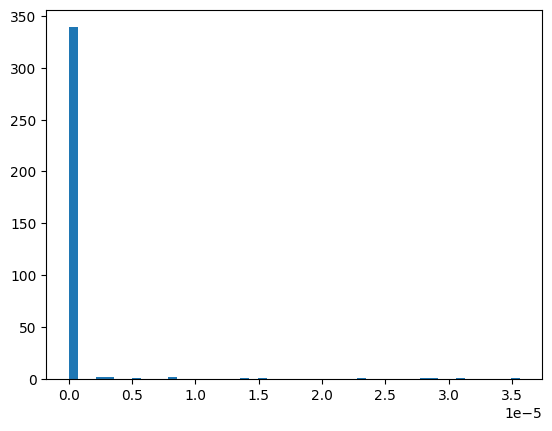

In [ ]:
# plot histogram of total average importance scores for genes
plt.hist(np.abs(lmdi_importances.iloc[:,:-12]).mean(axis=0), bins = 50)
plt.show()